In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Project5_AgeGenderEmotion_Detection/1.3_emotion_input_output
!pwd
!ls

/content/drive/My Drive/Project5_Computer_Vision_in_Retail/1.3_emotion_input_output
/content/drive/My Drive/Project5_Computer_Vision_in_Retail/1.3_emotion_input_output
input  output


In [ ]:
# import zipfile
# with zipfile.ZipFile('./archive.zip', 'r') as zip_ref:
#     zip_ref.extractall('./')

In [ ]:
fldr='./input/CK+48'
import os
files=os.listdir(fldr)

files

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [ ]:
Exp=files

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

i=0
last=[]
images=[]
labels=[]

for fle in files:
  idx=Exp.index(fle)
  label=idx

  if  label in [4, 6]:  # label in ["happy", "surprise"]
    changed_label=0
  elif label in [0]:    # label in ["anger"]
    changed_label=1 
  else:                 # label in ['contempt', 'disgust', 'fear', 'sadness']
    changed_label=2
  
  total=fldr+'/'+fle
  files_exp= os.listdir(total)
  
  for fle_2 in files_exp:
    file_main=total+'/'+fle_2
    print(file_main+"\t"+str(changed_label))
    
    image= cv2.imread(file_main)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(changed_label)
    i+=1
  last.append(i)

./input/CK+48/anger/S010_004_00000017.png	1
./input/CK+48/anger/S010_004_00000018.png	1
./input/CK+48/anger/S011_004_00000020.png	1
./input/CK+48/anger/S010_004_00000019.png	1
./input/CK+48/anger/S011_004_00000019.png	1
./input/CK+48/anger/S014_003_00000028.png	1
./input/CK+48/anger/S011_004_00000021.png	1
./input/CK+48/anger/S014_003_00000030.png	1
./input/CK+48/anger/S014_003_00000029.png	1
./input/CK+48/anger/S022_005_00000030.png	1
./input/CK+48/anger/S022_005_00000031.png	1
./input/CK+48/anger/S022_005_00000032.png	1
./input/CK+48/anger/S026_003_00000013.png	1
./input/CK+48/anger/S026_003_00000014.png	1
./input/CK+48/anger/S026_003_00000015.png	1
./input/CK+48/anger/S028_001_00000022.png	1
./input/CK+48/anger/S028_001_00000023.png	1
./input/CK+48/anger/S028_001_00000024.png	1
./input/CK+48/anger/S029_001_00000018.png	1
./input/CK+48/anger/S029_001_00000019.png	1
./input/CK+48/anger/S029_001_00000017.png	1
./input/CK+48/anger/S032_003_00000015.png	1
./input/CK+48/anger/S032_003_000

In [ ]:
from google.colab.patches import cv2_imshow

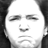

In [ ]:
cv2_imshow(images[24]) # this is how are image dataset is like

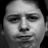

In [ ]:
cv2_imshow(images[82]) # this is how are image dataset is like

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

images_f=np.array(images)
labels_f=np.array(labels)

images_f_2=images_f/255

In [ ]:
images_f_2.shape

(981, 48, 48)

In [ ]:
num_of_classes=3
labels_encoded=tf.keras.utils.to_categorical(labels_f,num_classes=num_of_classes)

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_encoded,test_size=0.25, random_state=10)

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x

def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(128,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  output= Dense(3,activation="sigmoid")(drop_1)

  model = Model(inputs=[inputs], outputs=[output])

  model.compile(loss="categorical_crossentropy", optimizer="Adam",
	metrics=["accuracy"])
  return model

In [ ]:
Model=model(input_shape = (48,48,1))

In [ ]:
Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0     

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fle_s='./output/emotion_model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
History=Model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=350,callbacks=[callback_list])


Epoch 1/350
23/23 [==============================] - 18s 24ms/step - loss: 1.2331 - accuracy: 0.4680 - val_loss: 1.1523 - val_accuracy: 0.4146

Epoch 00001: loss improved from inf to 1.23307, saving model to ./output/emotion_model.h5
Epoch 2/350
23/23 [==============================] - 0s 6ms/step - loss: 1.1078 - accuracy: 0.4816 - val_loss: 1.1175 - val_accuracy: 0.4146

Epoch 00002: loss improved from 1.23307 to 1.10782, saving model to ./output/emotion_model.h5
Epoch 3/350
23/23 [==============================] - 0s 6ms/step - loss: 1.0155 - accuracy: 0.5007 - val_loss: 0.9240 - val_accuracy: 0.6748

Epoch 00003: loss improved from 1.10782 to 1.01551, saving model to ./output/emotion_model.h5
Epoch 4/350
23/23 [==============================] - 0s 6ms/step - loss: 0.8254 - accuracy: 0.6095 - val_loss: 0.8464 - val_accuracy: 0.7236

Epoch 00004: loss improved from 1.01551 to 0.82535, saving model to ./output/emotion_model.h5
Epoch 5/350
23/23 [==============================] - 0s 6m

In [ ]:
score = Model.evaluate(X_train, Y_train)

23/23 [==============================] - 0s 4ms/step - loss: 0.0285 - accuracy: 1.0000


In [ ]:
score = Model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9715


In [ ]:
Pred=Model.predict(X_test)

In [ ]:
Exp_changed= ["positive", "negative", "neutral"]

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  print("Label actual:  " + Exp_changed[labels[ind]]  )
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  pred_class=Exp_changed[int(np.argmax(pred_1))]
  print("Predicted Label: "+ pred_class)

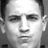

Label actual:  negative
Predicted Label: negative


In [ ]:
test_image(72,images_f,images_f_2,Model)

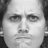

Label actual:  negative
Predicted Label: negative


In [ ]:
test_image(132,images_f,images_f_2,Model)

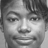

Label actual:  neutral
Predicted Label: neutral


In [ ]:
test_image(147,images_f,images_f_2,Model)

In [ ]:
import matplotlib.pyplot as plt

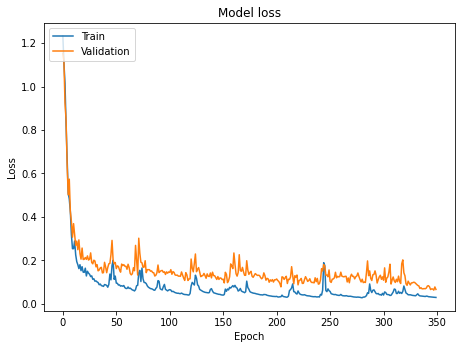

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

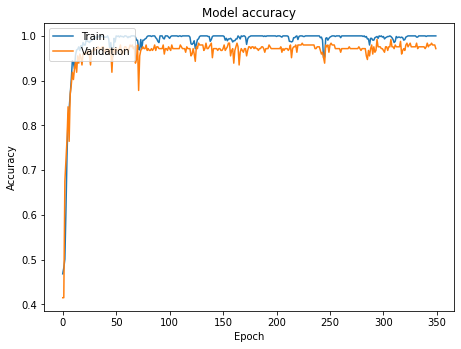

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

In [ ]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report

In [ ]:
i=0
Y_test_l=[]
Pred_l=[]
while(i<len(Pred)):
  Y_test_l.append(int(np.argmax(Y_test[i])))
  Pred_l.append(int(np.argmax(Pred[i])))
  i+=1

In [ ]:
report=classification_report(Y_test_l, Pred_l)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       0.94      0.86      0.90        35
           2       0.96      0.98      0.97       109

    accuracy                           0.97       246
   macro avg       0.96      0.95      0.95       246
weighted avg       0.97      0.97      0.97       246



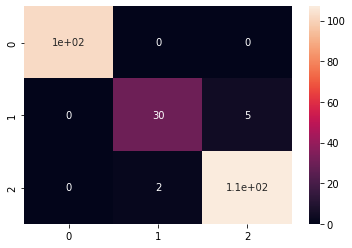

In [ ]:
results = confusion_matrix(Y_test_l, Pred_l)
import seaborn as sns
sns.heatmap(results, annot=True)